In [18]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Subir imagen
uploaded = files.upload()



Saving IMG_9066.JPEG to IMG_9066 (16).JPEG


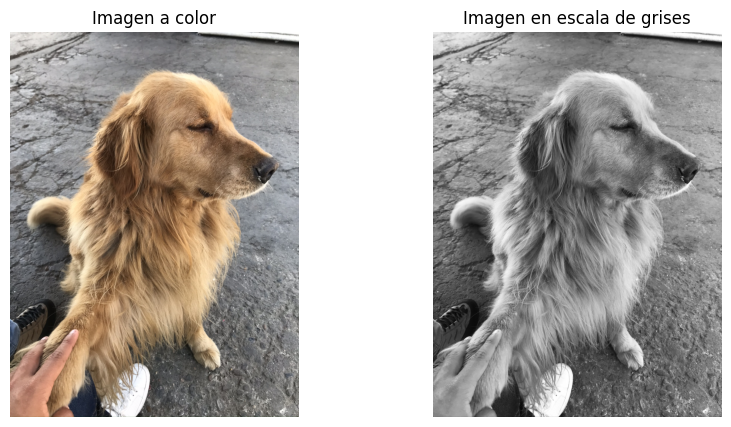

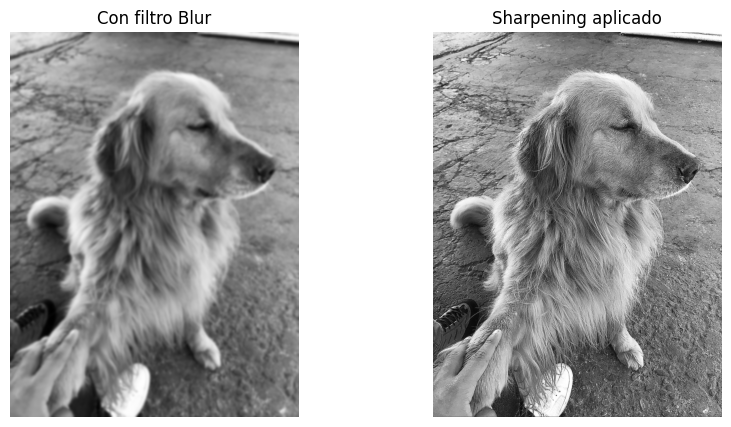

In [19]:
# Cargar imagen (suponemos que solo se subió una)
for file_name in uploaded.keys():
    # Abrir imagen a color
    img_color = Image.open(file_name)

    # Convertir a escala de grises
    img_gray = img_color.convert("L")

    # Mostrar imágenes
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Imagen a color")
    plt.imshow(img_color)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Imagen en escala de grises")
    plt.imshow(img_gray, cmap='gray')
    plt.axis("off")
    plt.show()


# Convertir imagen PIL a NumPy array (grayscale)
img_gray_np = np.array(img_gray)

#print(img_gray_np)

# Aplicar filtro blur (desenfoque) usando una convolución con un kernel 35x35 (para mayor desenfoque)
blurred = cv2.GaussianBlur(img_gray_np, (35, 35), 0)

# Kernel de sharpening (enfoque)
sharpen_kernel = np.array([[ -1, -1,  -1],
                           [-1,  9, -1],
                           [ -1, -1,  -1]])

# Aplicar filtro de sharpening usando cv2.filter2D
sharpened = cv2.filter2D(img_gray_np, -1, sharpen_kernel)

# Mostrar imagen original y desenfocada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Con filtro Blur")
plt.imshow(blurred, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Sharpening aplicado")
plt.imshow(sharpened, cmap='gray')
plt.axis("off")
plt.show()

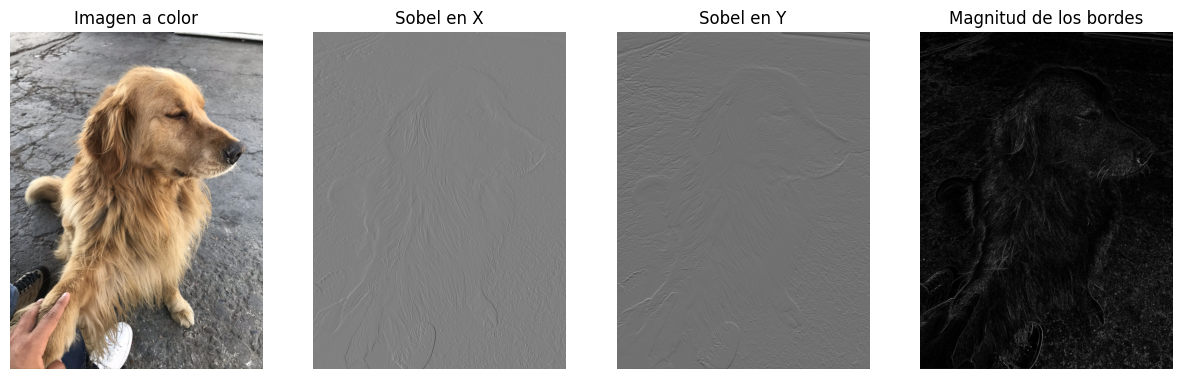

In [34]:
# Aplicar filtro Sobel en X y Y
sobel_x = cv2.Sobel(img_gray_np, cv2.CV_64F, 1, 0, ksize=3)  # Sobel en X
sobel_y = cv2.Sobel(img_gray_np, cv2.CV_64F, 0, 1, ksize=3)  # Sobel en Y

# Magnitud de los bordes combinando Sobel X y Y
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Mostrar las imágenes con los bordes detectados
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title("Imagen a color")
plt.imshow(img_color)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Sobel en X")
plt.imshow(sobel_x, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Sobel en Y")
plt.imshow(sobel_y, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Magnitud de los bordes")
plt.imshow(sobel_magnitude, cmap='gray')
plt.axis("off")

plt.show()


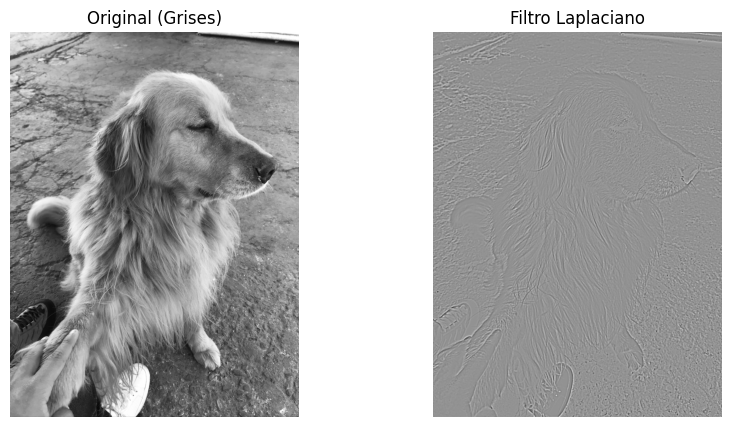

In [31]:
# Aplicar filtro Laplaciano
laplacian = cv2.Laplacian(img_gray_np, cv2.CV_64F, ksize=31)

# Mostrar imagen original y resultado del filtro Laplaciano
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original (Grises)")
plt.imshow(img_gray_np, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Filtro Laplaciano")
plt.imshow(laplacian, cmap='gray')
plt.axis("off")

plt.show()